## Homework 6
### Sungwon Lee
### 017473950

In [34]:
import numpy as np
import numpy.linalg as nla

# Question 2

In [35]:
A = np.array([[1,4],[-4,-7]])
print(A)

[[ 1  4]
 [-4 -7]]


In [36]:
evalue, evector = nla.eig(A)
print("Eigenvalue is :")
print(evalue.real)
print()
print("Eigenvector is :")
print(evector.real)

Eigenvalue is :
[-3. -3.]

Eigenvector is :
[[ 0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


# Question 3

## 3.1)

In [37]:
from skimage import io
import matplotlib.pyplot as plt
from scipy.linalg import svd as SVD

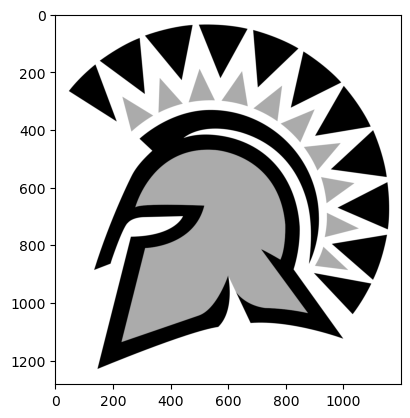

In [38]:
img = io.imread("sjsu.png", as_gray=True)
plt.imshow(img,'gray')

## 3.2)

In [39]:
print(f"The size of array of sjsu img : {img.shape}")

The size of array of sjsu img : (1283, 1200)


In [40]:
height,width = img.shape

print(f"The number of elements we need to save : {height * width}")

The number of elements we need to save : 1539600


## 3.3)

In [41]:
U, s, V = SVD(img)
U.shape, s.shape, V.shape

((1283, 1283), (1200,), (1200, 1200))

In [42]:
print(U)

[[-3.58361805e-02  1.47580384e-02 -1.38064581e-02 ... -1.79531913e-03
  -6.65328895e-04  5.27238824e-03]
 [-3.58361805e-02  1.47580384e-02 -1.38064581e-02 ...  1.85701227e-02
   1.21311119e-03  1.15031991e-02]
 [-3.58361805e-02  1.47580384e-02 -1.38064581e-02 ... -4.86359863e-03
  -3.09192710e-02 -1.34744775e-02]
 ...
 [-3.58361805e-02  1.47580384e-02 -1.38064581e-02 ...  7.64153725e-01
  -2.07400808e-01 -6.43773416e-02]
 [-3.58361805e-02  1.47580384e-02 -1.38064581e-02 ... -1.58110909e-01
   4.44280513e-01 -6.35234780e-02]
 [-3.58361805e-02  1.47580384e-02 -1.38064581e-02 ... -6.02445237e-02
  -1.95405977e-02  1.82509681e-01]]


In [43]:
S = np.zeros((1283,1200))
for i in range(1200):
    S[i,i] = s[i]
print(S)   

[[957.79795632   0.           0.         ...   0.           0.
    0.        ]
 [  0.         146.38691509   0.         ...   0.           0.
    0.        ]
 [  0.           0.         128.33690783 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


In [44]:
print(V)

[[-3.71074057e-02 -3.71074057e-02 -3.71074057e-02 ... -3.71074057e-02
  -3.71074057e-02 -3.71074057e-02]
 [-1.59806857e-02 -1.59806857e-02 -1.59806857e-02 ... -1.59806857e-02
  -1.59806857e-02 -1.59806857e-02]
 [ 1.48929704e-03  1.48929704e-03  1.48929704e-03 ...  1.48929704e-03
   1.48929704e-03  1.48929704e-03]
 ...
 [ 0.00000000e+00  4.48840726e-19  4.86567012e-19 ...  5.67285599e-20
  -1.09587782e-18  3.27425640e-19]
 [ 0.00000000e+00  7.60251945e-19  6.43171357e-19 ... -3.30293344e-19
   2.46492594e-18  2.05289644e-18]
 [ 0.00000000e+00 -3.30261235e-01  2.37345704e-01 ... -2.36760233e-01
  -2.20675020e-01  2.86765072e-02]]


In [45]:
print(U@S@V)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


## 3.4) k = 30

In [46]:
k = 30

UK = U[:,0:k]
SK = S[0:k, 0:k]
VK = V[0:k,:]

In [47]:
imgRK = UK@SK@VK

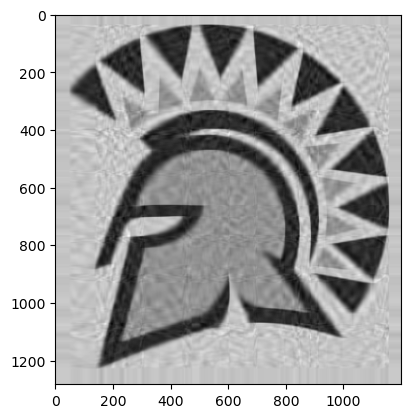

In [48]:
# img plot when reconstructing with only 30 components

plt.imshow(imgRK, 'gray')

In [49]:
# 30th value of sigma

print(f"30th value of sigma is : {SK[-1][-1]}")
print(f"The rounded up value of sigma is : {np.round((SK[-1][-1]))}")

30th value of sigma is : 19.19212043089814
The rounded up value of sigma is : 19.0


In [50]:
# number of elements we should save for reconstructed image

elements30 = UK.shape[0] * UK.shape[1] + SK.shape[0] * SK.shape[1] + VK.shape[0] * VK.shape[1]

print(f"We need to save {elements30} elements for reconstructed image of k = 30")

We need to save 75390 elements for reconstructed image of k = 30


In [51]:
# calculate number of elements of reduced S30, U30, V30

print(f"Number of elements for S30 : {SK.shape[0] * SK.shape[1]}")
print(f"Number of elements for U30 : {UK.shape[0] * UK.shape[1]}")
print(f"Number of elements for V30 : {VK.shape[0] * VK.shape[1]}")

Number of elements for S30 : 900
Number of elements for U30 : 38490
Number of elements for V30 : 36000


## 3.5) k = 300

In [52]:
k = 300

UK = U[:,0:k]
SK = S[0:k, 0:k]
VK = V[0:k,:]

In [53]:
imgRK = UK@SK@VK

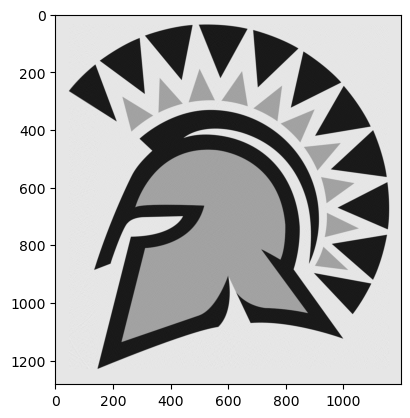

In [54]:
# img plot when reconstructing with only 300 components

plt.imshow(imgRK, 'gray')

In [55]:
# 300th value of sigma

print(f"300th value of sigma is : {(SK[-1][-1])}")
print(f"The rounded up value of sigma is : {np.round((SK[-1][-1]))}")

300th value of sigma is : 1.6234292215732131
The rounded up value of sigma is : 2.0


In [56]:
# number of elements we should save for reconstructed image

elements30 = UK.shape[0] * UK.shape[1] + SK.shape[0] * SK.shape[1] + VK.shape[0] * VK.shape[1]

print(f"We need to save {elements30} elements for reconstructed image of k = 300")

We need to save 834900 elements for reconstructed image of k = 300


In [57]:
# calculate number of elements of reduced S300, U300, V300

print(f"Number of elements for S300 : {SK.shape[0] * SK.shape[1]}")
print(f"Number of elements for U300 : {UK.shape[0] * UK.shape[1]}")
print(f"Number of elements for V300 : {VK.shape[0] * VK.shape[1]}")

Number of elements for S300 : 90000
Number of elements for U300 : 384900
Number of elements for V300 : 360000
